## 最近邻和维度惩罚

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

### K 近邻分类器

In [2]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [3]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [4]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### 维度惩罚

[维度惩罚](https://zh.wikipedia.org/wiki/%E7%BB%B4%E6%95%B0%E7%81%BE%E9%9A%BE)

## 线性模型：从回归到稀疏

In [5]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

### 线性回归

In [7]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [9]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898218

In [10]:
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690572

### 收缩

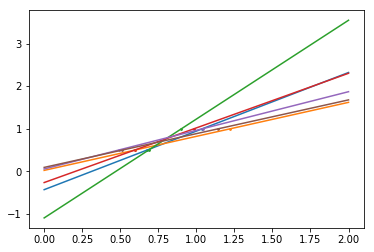

In [12]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt 

plt.figure() 
np.random.seed(0)
for _ in range(6): 
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3)  

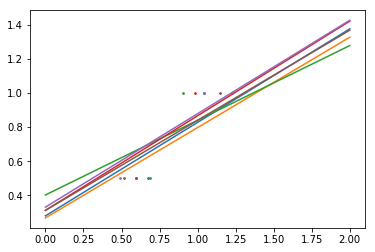

In [13]:
regr = linear_model.Ridge(alpha=.1)
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

In [14]:
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha
        ).fit(diabetes_X_train, diabetes_y_train
        ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas])

[0.5851110683883529, 0.5852073015444674, 0.5854677540698491, 0.5855512036503916, 0.583071708555416, 0.5705899943728009]


### 稀疏

In [15]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha
        ).fit(diabetes_X_train, diabetes_y_train
        ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


### 分类

In [17]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## 支持向量机 (SVMs)

### 线性 SVMs

In [18]:
from sklearn import svm

svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 使用核

**线性核**

In [19]:
svc = svm.SVC(kernel='linear')

**多项式核**

In [20]:
svc = svm.SVC(kernel='poly', degree=3)

**RBF核**

In [21]:
svc = svm.SVC(kernel='rbf')